In [25]:
import csv
import csv, collections, re, math, numpy as np, matplotlib.pyplot as plt


# Spam Filter using Naive Bayes Classifier

You are given a collection of SMS text messages in `sms.csv` as a tab separated CSV file. The first column of this file tells whether the message is a spam or not spam and the second column gives the message. Assume that this dataset is labelled correctly as spam or not spam. We  will use this dataset as the training data to build a spam filter. 

(a) Analyze the dataset and identify top ten spam words and top ten non-spam words  and their frequency counts. Make sure that you first remove articles ("a", "and", "the") and <=4 letter propositions ("for", "off", "in", "from" and so on).  

In [26]:

lst_csv = []
with open('./sms.csv', 'r') as file:
  csv_reader = csv.reader(file, delimiter='\t')
  for row in csv_reader:
    ch = ''
    for string in row[1:]:
      ch += string
    
    lst_csv.append([row[0],ch])



In [27]:

for row in lst_csv:
  if len(row)!=2:
    print(False)
    break
print(True)

True


In [28]:
# for row in lst_csv:
#   print(row)

In [29]:
messages = [
  row[1] for row in lst_csv
]

In [30]:
from collections import Counter

In [31]:
# z = Counter(messages)

In [32]:
message_words = []
abandon_words = set('a an the on at for from in out to and is of my me your have it are that or be with will not can 2 if'.split())

abandon_words_lst = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

abandon_words_lst = [
  h for h in abandon_words_lst if len(h) <=4
]

# if we want to split the dataset to training and testing dataset
# lst_csv, test_set = lst_csv[0:int(0.8 * len(lst_csv))], lst_csv[int(0.8 * len(lst_csv)):]

abandon_words = abandon_words.union(
  set(abandon_words_lst)
)
spam_words = []
non_spam_words = []
for row in lst_csv:
  string = row[1]
  if isinstance(string, str):
    lst = string.split()
    # string = string.strip('$.,/!@#$%^&*()-=_+[]{}1234567890 ')

    lst = [
      word.strip('$.,/!@#$%^&*()-=_+[]{}1234567890£ ') for word in lst
    ]
    lst = [
      word.replace("\'s",'') for word in lst
    ]
    lst = [
      word.strip('\'\"') for word in lst
    ]
    lst = [
      word.lower() for word in lst if word!=''
    ]

    # string = string.lower()
    # z = string.split()
    lst_to_extend = []
    
    for word in lst:
      if word not in abandon_words:
        lst_to_extend.append(word)

    message_words.extend(lst_to_extend)
    if row[0] == 'spam':
      spam_words.extend(lst_to_extend)
    else:
      non_spam_words.extend(lst_to_extend)


In [33]:
# for word in message_words:
#   print(word)
# print(message_words)
z = Counter(message_words)
# print(z)
z.most_common(10)


[('u', 1060),
 ('call', 568),
 ('ur', 381),
 ('get', 375),
 ("i'm", 372),
 ('lt;#&gt;', 275),
 ('go', 270),
 ('free', 268),
 ('ok', 258),
 ('know', 246)]

In [34]:
# import re
# stri = "we's+op hefklj*uh&jj12"
# l = re.findall(r'\w+',stri)
# print(l)

In [35]:
# spam_words

spam_words_count = Counter(spam_words)
non_spam_words_count = Counter(non_spam_words)


In [36]:
# spam_words_count.most_common(10)

(b) Let `W` be the random variable denoting a word and `T` be the random variable denoting a message's type (spam or non-spam). For each of the words `w` (spam or non-spam), estimate the likelihood probabilities (aka the conditional probabilities) `Pr(W = w | T=spam)` and `Pr(W=w | T=non-spam)` as two separate functions. Note  that in order to compute these likelihoods this, you need to compute how many times `w` appears in the corpus (spam or not spam) and the total number of words (including duplicates) in that corpus. If a word does not occur at all, then assign it a non-zero yet small probability fixed suitably. Note that the likelihoods `Pr(w | spam)` and `Pr(w | non-spam)` have to be estimated after suitably removing articles and propositions as done in (a). 

In [37]:

prob_w_given_spam = dict()
prob_w_given_non_spam = dict()
total_spam_words = len(spam_words)
total_non_spam_words = len(non_spam_words)
for word in message_words:
  try:
    # if word present in spam_words
    freq_word = spam_words_count[word]
    prob_w_given_spam[word] = freq_word/total_spam_words
  except:
    # if word not in spam words
    prob_w_given_spam[word] = 0.001

  try:
    # if word present in non_spam_words
    freq_word = non_spam_words_count[word]
    prob_w_given_non_spam[word] = freq_word/total_non_spam_words
  except:
    # if word not in non spam words
    prob_w_given_non_spam[word] = 0.001




In [38]:
print(sum(prob_w_given_non_spam.values()))
print(sum(prob_w_given_spam.values()))

for val in prob_w_given_spam.values():
  if val > 1:
    print(False)
    
for val in prob_w_given_non_spam.values():
  if val > 1:
    print(False)



1.0000000000000593
0.9999999999999731


In [39]:
prob_spam = total_spam_words / (total_spam_words + total_non_spam_words)
prob_not_spam = total_non_spam_words / (total_spam_words + total_non_spam_words)

(c) Let `M` be the random variable denoting a message (consisting of multiple words). Using the likelihood probabilities calculated in (b), implement a classifier that takes in a new SMS message `m=w1 w2 ... wi` and checks if it is spam or not using the naive Bayes' assumption. That is, compute `P(T=spam | M=m)` and `P(T=non-spam | M=m)` assuming that `P(m | spam) = P(w1 | spam) x P(w2 | spam) x ... x P(wi | spam)` and use this computation to decide if `m` is spam or not. 

In [40]:
def predict_spam_message(message: str, spam_words: list, non_spam_words: list):
  lst_words = message.split()
  lst_words = [
    word.lower() for word in lst_words
  ]
  predict_spam = 1
  predict_non_spam = 1
  
  prob_w_given_spam = dict()
  prob_w_given_non_spam = dict()
  total_spam_words = len(spam_words)
  total_non_spam_words = len(non_spam_words)
  for word in message_words:
    try:
      # if word present in spam_words
      freq_word = spam_words_count[word]
      prob_w_given_spam[word] = freq_word/total_spam_words
    except:
      # if word not in spam words
      prob_w_given_spam[word] = 0.001

    try:
      # if word present in non_spam_words
      freq_word = non_spam_words_count[word]
      prob_w_given_non_spam[word] = freq_word/total_non_spam_words
    except:
      # if word not in non spam words
      prob_w_given_non_spam[word] = 0.001
  prob_spam = total_spam_words / (total_spam_words + total_non_spam_words)
  prob_not_spam = total_non_spam_words / (total_spam_words + total_non_spam_words)


  for word in lst_words:
    try:
      prob_word_given_spam = prob_w_given_spam[word]
      predict_spam *= prob_word_given_spam
    except:
      predict_spam *= 0.001
    
    try:
      prob_word_given_not_spam = prob_w_given_non_spam[word]
      predict_non_spam *= prob_word_given_not_spam
    except:
      predict_non_spam *= 0.001
    
  predict_spam *= prob_spam
  predict_non_spam *= prob_not_spam

  if predict_spam > predict_non_spam:
    return 'Spam'
  else:
    return 'Not spam'

  

In [41]:

predict_spam_message('call free ur u',spam_words, non_spam_words)



'Spam'

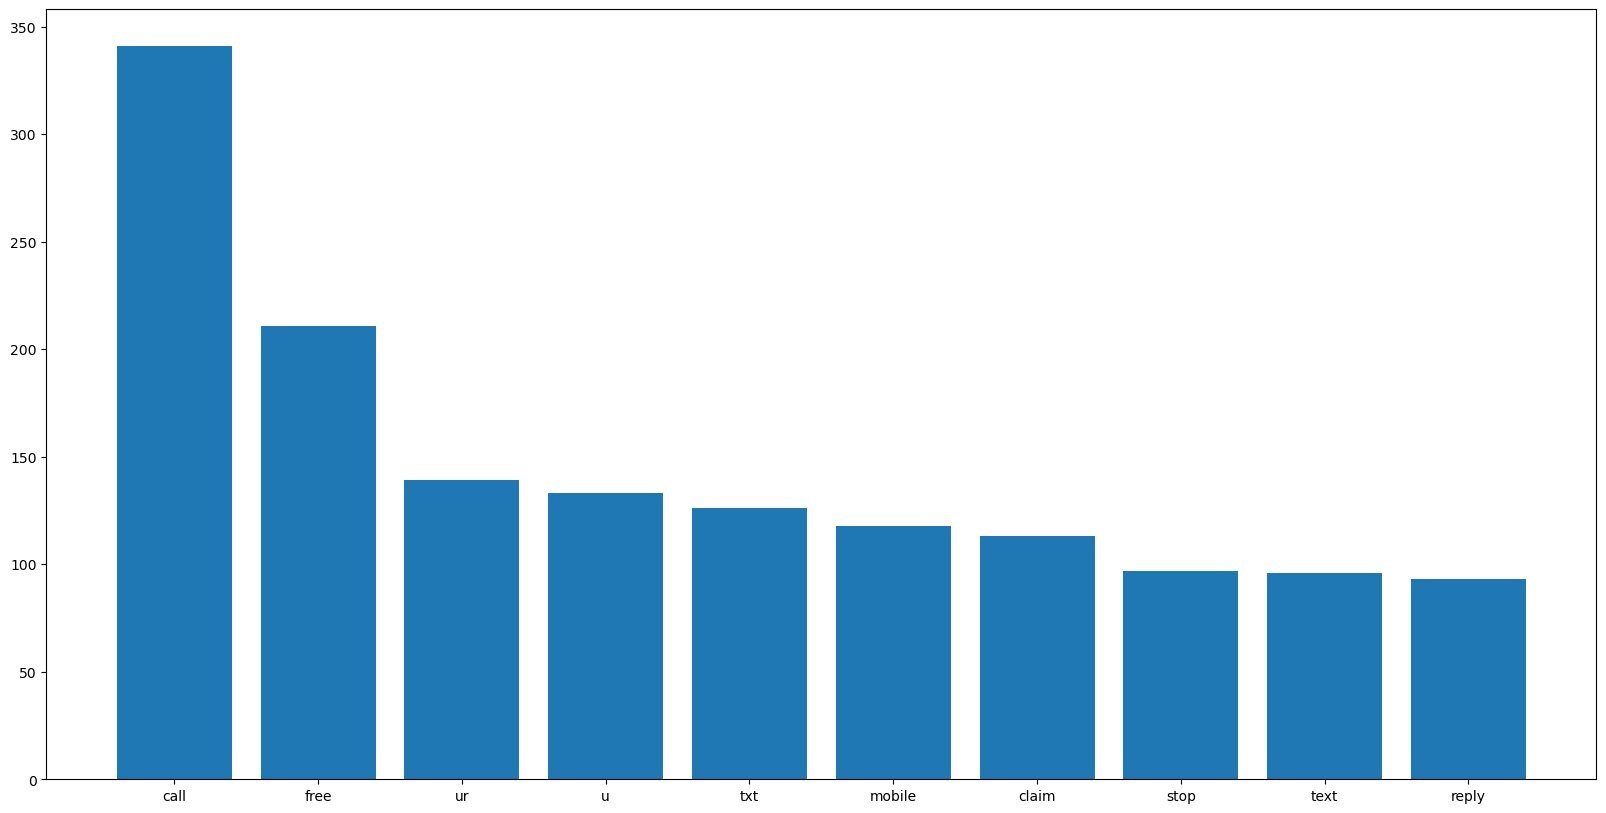

In [42]:
# plt.bar(spam_words_count.most_common(10))


x = spam_words_count.most_common(10)
plt.figure(figsize=(20,10))
# print(x)
plt.bar(
  [y[0] for y in x],
  [y[1] for y in x]
)

plt.show()

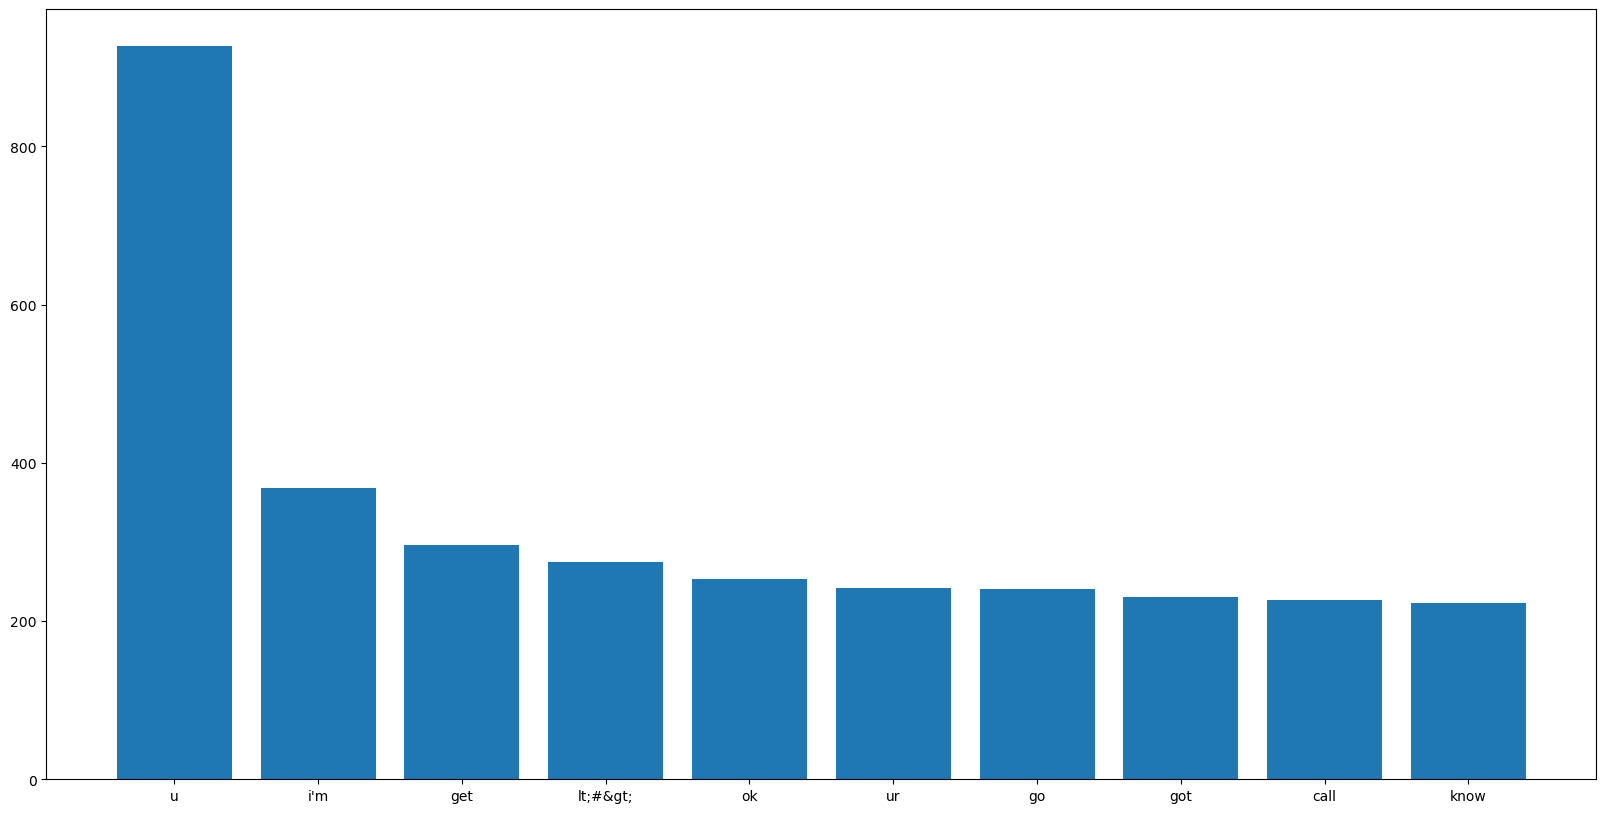

In [43]:

x = non_spam_words_count.most_common(10)
plt.figure(figsize=(20,10))
# print(x)
plt.bar(
  [y[0] for y in x],
  [y[1] for y in x]
)

plt.show()

In [44]:

# accuracy for training dataset

# count = 0

# for row in lst_csv:
#   if row[0] == 'spam' and predict_spam_message(row[1], spam_words, non_spam_words) == 'Spam':
#     count += 1
#   elif row[0] == 'notspam' and predict_spam_message(row[1], spam_words, non_spam_words) == 'Not spam':
#     count += 1


# print(count/len(lst_csv))


In [45]:
def predict_spam_message_using_dictionary(message: str, prob_w_given_spam: dict, prob_w_given_non_spam: dict):
  lst_words = message.split()
  lst_words = [
    word.lower() for word in lst_words
  ]
  predict_spam = 1
  predict_non_spam = 1
  
  # prob_w_given_spam = dict()
  # prob_w_given_non_spam = dict()
  global total_spam_words
  global total_non_spam_words 
  for word in message_words:
    try:
      # if word present in spam_words
      freq_word = spam_words_count[word]
      prob_w_given_spam[word] = freq_word/total_spam_words
    except:
      # if word not in spam words
      prob_w_given_spam[word] = 0.001

    try:
      # if word present in non_spam_words
      freq_word = non_spam_words_count[word]
      prob_w_given_non_spam[word] = freq_word/total_non_spam_words
    except:
      # if word not in non spam words
      prob_w_given_non_spam[word] = 0.001
  prob_spam = total_spam_words / (total_spam_words + total_non_spam_words)
  prob_not_spam = total_non_spam_words / (total_spam_words + total_non_spam_words)


  for word in lst_words:
    try:
      prob_word_given_spam = prob_w_given_spam[word]
      predict_spam *= prob_word_given_spam
    except:
      predict_spam *= 0.001
    
    try:
      prob_word_given_not_spam = prob_w_given_non_spam[word]
      predict_non_spam *= prob_word_given_not_spam
    except:
      predict_non_spam *= 0.001
    
  predict_spam *= prob_spam
  predict_non_spam *= prob_not_spam

  if predict_spam > predict_non_spam:
    return 'Spam'
  else:
    return 'Not spam'

  

In [46]:

# accuracy for training dataset

# count = 0

# # for row in lst_csv:
# for i in range(len(lst_csv)):
#   row = lst_csv[i]
#   print(i)

#   if row[0] == 'spam' and predict_spam_message_using_dictionary(row[1], prob_w_given_spam, prob_w_given_non_spam) == 'Spam':
#     count += 1
#   elif row[0] == 'notspam' and predict_spam_message_using_dictionary(row[1], prob_w_given_spam, prob_w_given_non_spam) == 'Not spam':
#     count += 1


# print(count/len(lst_csv))


# accuracy is 0.9928519061583577



(d) Test your classifier against 4-5 SMS messages (spam as well as non-spam) that you have received in your mobile phone.

In [47]:
# predict_spam_message(message, spam_words, non_spam_words)

message_in_mobile = [
  'Receive Rs.1500* Bonus',
  'Goibibo: Need to travel to Thekkady? Then book an amazing stay & get upto 25% OFF. Code: GISUPER. Book now. go.ibibo.com/MsUpqC',
  'Hi Neeraj, Rs 30 corner is live for you on bigbasket. Find all the best sellers within Rs 30 here https://u1.mnge.co/33EEQE8',
  'Welcome to Jio-Kerala. Kindly enable Data Roaming to use data services. Data, Voice & SMS benefits will be as per your plan.',
  'Dear Customer, You have a missed call from The last missed call was at 11:51 AM on 24-Feb-2023 Thankyou, Team Jio.',
  "Don't lock if u feel u won't hear when I knock the door",
  "I'm posting it here, so that if someone gets a solution, please post the solution (even if it is done roughly) too, so that everyone can refer to it if they don't get...",
  "As of now it seems best that we just do some background check on the proffs",
]

for m in message_in_mobile:
  print(predict_spam_message(m,spam_words,non_spam_words))


Spam
Spam
Not spam
Not spam
Spam
Not spam
Not spam
Not spam


In [48]:
# z = 0
# for row in test_set:
#   x = predict_spam_message(row[1], spam_words, non_spam_words)
#   if x=='Spam' and row[0] == 'spam':
#     z += 1
#   elif x == 'Not spam' and row[0] == 'notspam':
#     z += 1


# print(z/len(test_set))



